In [1]:
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


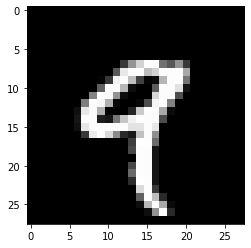

In [2]:
from matplotlib import pyplot
pyplot.imshow(trainX[4], cmap='gray')

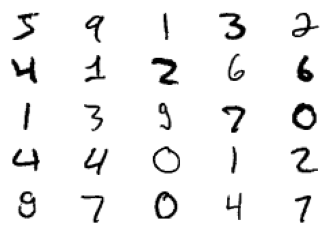

In [3]:
for i in range(25):
    pyplot.subplot(5, 5, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(trainX[i*4], cmap='gray_r')
pyplot.show()

In [4]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
        

In [5]:
def discriminator():
    model=Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [6]:
dsc= discriminator()

In [7]:
dsc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [10]:

def load_real_samples():
    (trainX, _), (_, _) = load_data()
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = X / 255.0
    return X

In [11]:
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y


In [17]:
def generate_fake_samples(n_samples):
    X = rand(28 * 28 * n_samples)
    X = X.reshape((n_samples, 28, 28, 1))
    y = zeros((n_samples, 1))
    return X, y

In [18]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch / 2)
    for i in range(n_iter):
        X_real, y_real = generate_real_samples(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [19]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
dataset = load_real_samples()
# fit the model
train_discriminator(dsc, dataset)

>1 real=91% fake=5%
>2 real=88% fake=6%
>3 real=93% fake=12%
>4 real=94% fake=23%
>5 real=95% fake=37%
>6 real=92% fake=60%
>7 real=95% fake=79%
>8 real=92% fake=92%
>9 real=95% fake=97%
>10 real=89% fake=98%
>11 real=88% fake=100%
>12 real=89% fake=100%
>13 real=89% fake=100%
>14 real=88% fake=100%
>15 real=91% fake=100%
>16 real=91% fake=100%
>17 real=95% fake=100%
>18 real=91% fake=100%
>19 real=88% fake=100%
>20 real=91% fake=100%
>21 real=91% fake=100%
>22 real=96% fake=100%
>23 real=94% fake=100%
>24 real=95% fake=100%
>25 real=100% fake=100%
>26 real=98% fake=100%
>27 real=97% fake=100%
>28 real=99% fake=100%
>29 real=95% fake=100%
>30 real=98% fake=100%
>31 real=99% fake=100%
>32 real=100% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=

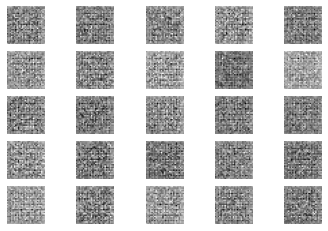

In [22]:
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot

def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model
 
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y
 
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    pyplot.subplot(5, 5, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
pyplot.show()

In [26]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 
latent_dim = 100
d_model = discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


In [27]:
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
    for i in range(n_epochs):
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)

In [28]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            d_loss, _ = d_model.train_on_batch(X, y)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))


In [30]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/234, d=0.695, g=0.691
>1, 2/234, d=0.692, g=0.712
>1, 3/234, d=0.679, g=0.723
>1, 4/234, d=0.672, g=0.738
>1, 5/234, d=0.669, g=0.757
>1, 6/234, d=0.658, g=0.767
>1, 7/234, d=0.656, g=0.780
>1, 8/234, d=0.649, g=0.794
>1, 9/234, d=0.643, g=0.797
>1, 10/234, d=0.641, g=0.804
>1, 11/234, d=0.640, g=0.802
>1, 12/234, d=0.638, g=0.794
>1, 13/234, d=0.641, g=0.782
>1, 14/234, d=0.634, g=0.768
>1, 15/234, d=0.636, g=0.753
>1, 16/234, d=0.636, g=0.739
>1, 17/234, d=0.633, g=0.728
>1, 18/234, d=0.627, g=0.719
>1, 19/234, d=0.626, g=0.712
>1, 20/234, d=0.621, g=0.706
>1, 21/234, d=0.614, g=0.702
>1, 22/234, d=0.602, g=0.699
>1, 23/234, d=0.595, g=0.699
>1, 24/234, d=0.590, g=0.698
>1, 25/234, d=0.581, g=0.698
>1, 26/234, d=0.567, g=0.698
>1, 27/234, d=0.558, g=0.699
>1, 28/234, d=0.548, g=0.699
>1, 29/234, d=0.532, g=0.700
>1, 30/234, d=0.529, g=0.701
>1, 31/234, d=0.517, g=0.702
>1, 32/234, d=0.502, g=0.703
>1, 33/234, d=0.491, g=0.704
>1, 34/234, d=0.483, g=0.705
>1, 35/234, d=0.469, g=

>2, 21/234, d=0.671, g=0.909
>2, 22/234, d=0.655, g=0.904
>2, 23/234, d=0.680, g=0.895
>2, 24/234, d=0.652, g=0.876
>2, 25/234, d=0.651, g=0.891
>2, 26/234, d=0.658, g=0.848
>2, 27/234, d=0.643, g=0.856
>2, 28/234, d=0.662, g=0.863
>2, 29/234, d=0.640, g=0.831
>2, 30/234, d=0.656, g=0.853
>2, 31/234, d=0.646, g=0.811
>2, 32/234, d=0.656, g=0.818
>2, 33/234, d=0.667, g=0.804
>2, 34/234, d=0.644, g=0.795
>2, 35/234, d=0.656, g=0.778
>2, 36/234, d=0.654, g=0.808
>2, 37/234, d=0.648, g=0.763
>2, 38/234, d=0.671, g=0.787
>2, 39/234, d=0.661, g=0.770
>2, 40/234, d=0.667, g=0.781
>2, 41/234, d=0.662, g=0.773
>2, 42/234, d=0.655, g=0.806
>2, 43/234, d=0.666, g=0.792
>2, 44/234, d=0.668, g=0.757
>2, 45/234, d=0.661, g=0.734
>2, 46/234, d=0.686, g=0.738
>2, 47/234, d=0.675, g=0.733
>2, 48/234, d=0.652, g=0.746
>2, 49/234, d=0.666, g=0.744
>2, 50/234, d=0.665, g=0.785
>2, 51/234, d=0.681, g=0.733
>2, 52/234, d=0.650, g=0.743
>2, 53/234, d=0.653, g=0.737
>2, 54/234, d=0.668, g=0.730
>2, 55/234, d=

>3, 66/234, d=0.746, g=0.673
>3, 67/234, d=0.731, g=0.685
>3, 68/234, d=0.748, g=0.677
>3, 69/234, d=0.725, g=0.686
>3, 70/234, d=0.746, g=0.682
>3, 71/234, d=0.735, g=0.661
>3, 72/234, d=0.730, g=0.688
>3, 73/234, d=0.734, g=0.688
>3, 74/234, d=0.736, g=0.675
>3, 75/234, d=0.740, g=0.685
>3, 76/234, d=0.713, g=0.696
>3, 77/234, d=0.734, g=0.682
>3, 78/234, d=0.717, g=0.687
>3, 79/234, d=0.736, g=0.680
>3, 80/234, d=0.730, g=0.695
>3, 81/234, d=0.725, g=0.706
>3, 82/234, d=0.727, g=0.699
>3, 83/234, d=0.725, g=0.687
>3, 84/234, d=0.712, g=0.725
>3, 85/234, d=0.699, g=0.704
>3, 86/234, d=0.715, g=0.708
>3, 87/234, d=0.713, g=0.725
>3, 88/234, d=0.696, g=0.721
>3, 89/234, d=0.699, g=0.735
>3, 90/234, d=0.693, g=0.719
>3, 91/234, d=0.701, g=0.717
>3, 92/234, d=0.728, g=0.716
>3, 93/234, d=0.700, g=0.719
>3, 94/234, d=0.700, g=0.728
>3, 95/234, d=0.689, g=0.715
>3, 96/234, d=0.676, g=0.728
>3, 97/234, d=0.679, g=0.726
>3, 98/234, d=0.688, g=0.728
>3, 99/234, d=0.688, g=0.729
>3, 100/234, d

>4, 110/234, d=0.687, g=0.704
>4, 111/234, d=0.678, g=0.700
>4, 112/234, d=0.692, g=0.692
>4, 113/234, d=0.697, g=0.693
>4, 114/234, d=0.699, g=0.687
>4, 115/234, d=0.701, g=0.686
>4, 116/234, d=0.710, g=0.684
>4, 117/234, d=0.712, g=0.694
>4, 118/234, d=0.708, g=0.691
>4, 119/234, d=0.712, g=0.671
>4, 120/234, d=0.717, g=0.682
>4, 121/234, d=0.716, g=0.660
>4, 122/234, d=0.710, g=0.668
>4, 123/234, d=0.731, g=0.659
>4, 124/234, d=0.730, g=0.663
>4, 125/234, d=0.739, g=0.664
>4, 126/234, d=0.734, g=0.677
>4, 127/234, d=0.714, g=0.680
>4, 128/234, d=0.734, g=0.684
>4, 129/234, d=0.722, g=0.686
>4, 130/234, d=0.724, g=0.706
>4, 131/234, d=0.713, g=0.714
>4, 132/234, d=0.706, g=0.726
>4, 133/234, d=0.689, g=0.728
>4, 134/234, d=0.676, g=0.739
>4, 135/234, d=0.673, g=0.754
>4, 136/234, d=0.672, g=0.778
>4, 137/234, d=0.656, g=0.799
>4, 138/234, d=0.648, g=0.806
>4, 139/234, d=0.643, g=0.838
>4, 140/234, d=0.635, g=0.824
>4, 141/234, d=0.627, g=0.811
>4, 142/234, d=0.621, g=0.825
>4, 143/23

>5, 153/234, d=0.700, g=0.745
>5, 154/234, d=0.696, g=0.737
>5, 155/234, d=0.695, g=0.738
>5, 156/234, d=0.694, g=0.721
>5, 157/234, d=0.701, g=0.712
>5, 158/234, d=0.702, g=0.698
>5, 159/234, d=0.694, g=0.688
>5, 160/234, d=0.703, g=0.679
>5, 161/234, d=0.703, g=0.665
>5, 162/234, d=0.698, g=0.654
>5, 163/234, d=0.699, g=0.655
>5, 164/234, d=0.702, g=0.654
>5, 165/234, d=0.700, g=0.650
>5, 166/234, d=0.702, g=0.655
>5, 167/234, d=0.701, g=0.666
>5, 168/234, d=0.702, g=0.690
>5, 169/234, d=0.703, g=0.694
>5, 170/234, d=0.706, g=0.714
>5, 171/234, d=0.690, g=0.739
>5, 172/234, d=0.698, g=0.747
>5, 173/234, d=0.682, g=0.754
>5, 174/234, d=0.688, g=0.757
>5, 175/234, d=0.697, g=0.738
>5, 176/234, d=0.692, g=0.738
>5, 177/234, d=0.689, g=0.733
>5, 178/234, d=0.694, g=0.716
>5, 179/234, d=0.689, g=0.706
>5, 180/234, d=0.682, g=0.695
>5, 181/234, d=0.681, g=0.688
>5, 182/234, d=0.682, g=0.680
>5, 183/234, d=0.687, g=0.670
>5, 184/234, d=0.681, g=0.684
>5, 185/234, d=0.672, g=0.692
>5, 186/23

>6, 196/234, d=0.703, g=0.691
>6, 197/234, d=0.703, g=0.690
>6, 198/234, d=0.699, g=0.683
>6, 199/234, d=0.692, g=0.690
>6, 200/234, d=0.704, g=0.690
>6, 201/234, d=0.692, g=0.692
>6, 202/234, d=0.699, g=0.708
>6, 203/234, d=0.701, g=0.706
>6, 204/234, d=0.701, g=0.704
>6, 205/234, d=0.691, g=0.706
>6, 206/234, d=0.694, g=0.703
>6, 207/234, d=0.695, g=0.701
>6, 208/234, d=0.682, g=0.709
>6, 209/234, d=0.692, g=0.714
>6, 210/234, d=0.678, g=0.727
>6, 211/234, d=0.684, g=0.737
>6, 212/234, d=0.672, g=0.749
>6, 213/234, d=0.676, g=0.744
>6, 214/234, d=0.669, g=0.739
>6, 215/234, d=0.677, g=0.726
>6, 216/234, d=0.666, g=0.724
>6, 217/234, d=0.674, g=0.715
>6, 218/234, d=0.675, g=0.710
>6, 219/234, d=0.670, g=0.707
>6, 220/234, d=0.668, g=0.709
>6, 221/234, d=0.669, g=0.720
>6, 222/234, d=0.675, g=0.724
>6, 223/234, d=0.672, g=0.740
>6, 224/234, d=0.674, g=0.731
>6, 225/234, d=0.674, g=0.747
>6, 226/234, d=0.675, g=0.747
>6, 227/234, d=0.671, g=0.739
>6, 228/234, d=0.675, g=0.736
>6, 229/23

KeyboardInterrupt: 